<a href="https://colab.research.google.com/github/MoosaSaadat/handsonml/blob/master/handwritten_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [45]:
# Load dataset
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [46]:
# Analyse sets
print(f"Training set: {x_train.shape}")
print(f"Testing set:  {x_test.shape}")

Training set: (60000, 28, 28)
Testing set:  (10000, 28, 28)


In [47]:
# Scale features
x_train, x_test = x_train / 255, x_test / 255

This is number '3'


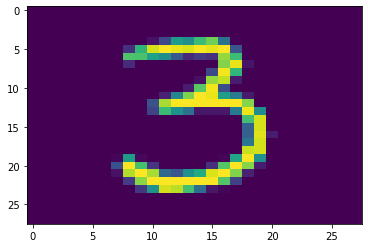

In [48]:
# Visualize data
idx = 50
print(f"This is number '{y_train[idx]}'")
plt.imshow(x_train[idx], aspect="auto")

In [49]:
# Create model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(600, activation="relu"),
    keras.layers.Dense(200, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 600)               471000    
_________________________________________________________________
dense_6 (Dense)              (None, 200)               120200    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                2010      
Total params: 593,210
Trainable params: 593,210
Non-trainable params: 0
_________________________________________________________________


In [50]:
# Compile model
model.compile(optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [53]:
# Train model
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0954 - accuracy: 0.9716
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0509 - accuracy: 0.9842
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0380 - accuracy: 0.9872
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0298 - accuracy: 0.9898
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0233 - accuracy: 0.9927
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0205 - accuracy: 0.9932
Epoch 7/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0196 - accuracy: 0.9938
Epoch 8/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0170 - accuracy: 0.9946
Epoch 9/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0172 - accuracy: 0.9948
Epoch 10/10
1875/1875 [==============================] - 12s 6ms/step - l

In [52]:
# Evaluate model
model.evaluate(x_test, y_test, verbose=2)

313/313 - 1s - loss: 0.1628 - accuracy: 0.9619


[0.16283531486988068, 0.961899995803833]

Model Prediction: 5
Actual Label: 5


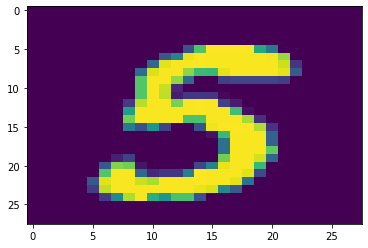

In [83]:
# Example test
idx = np.random.randint(x_test.shape[0])
prediction = np.argmax(model.predict(x_test[idx:idx+1]))

print(f"Model Prediction: {prediction}")
print(f"Actual Label: {y_test[idx]}")
plt.imshow(x_test[idx], aspect="auto")